<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.019029,52.105703,32.624146,56.800448,0.005850,246.555176,246.551083,0.004094
1,0.0,1.0,23.626033,90.004809,82.907590,70.910709,0.002733,277.451874,277.446106,0.005768
2,0.0,2.0,41.278427,99.496666,77.551289,77.752389,-0.003062,306.075708,306.074700,0.001008
3,0.0,3.0,65.040429,60.601333,76.971258,46.408732,0.004542,259.026294,259.024964,0.001331
4,0.0,4.0,83.269798,95.238348,90.147113,63.369928,0.000664,342.025851,342.025255,0.000596
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.888432,93.095641,50.113012,70.704033,0.001999,259.803117,259.796453,0.006664
59996,999.0,56.0,61.355010,35.015450,53.626257,48.059169,-0.004920,208.050966,208.056024,-0.005058
59997,999.0,57.0,62.646256,86.759063,42.559582,49.926870,0.002314,251.894084,251.887603,0.006482
59998,999.0,58.0,57.934209,94.995123,70.106732,27.952505,-0.002750,260.985820,260.982162,0.003658


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.019029  52.105703  32.624146  56.800448  0.005850  246.555176   
      1.0    23.626033  90.004809  82.907590  70.910709  0.002733  277.451874   
      2.0    41.278427  99.496666  77.551289  77.752389 -0.003062  306.075708   
      3.0    65.040429  60.601333  76.971258  46.408732  0.004542  259.026294   
      4.0    83.269798  95.238348  90.147113  63.369928  0.000664  342.025851   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   35.888432  93.095641  50.113012  70.704033  0.001999  259.803117   
      56.0   61.355010  35.015450  53.626257  48.059169 -0.004920  208.050966   
      57.0   62.646256  86.759063  42.559582  49.926870  0.002314  251.894084   
      58.0   57.934209  94.995123  70.106732  27.952505 -0.002750  260.985820   
      59.0   42.452038  99.660911  34.210333  85.988566 -0.001783  272.310065   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    246.551083  0.004094  
      1.0    277.446106  0.005768  
      2.0    306.074700  0.001008  
      3.0    259.024964  0.001331  
      4.0    342.025255  0.000596  
...                 ...       ...  
999.0 55.0   259.796453  0.006664  
      56.0   208.056024 -0.005058  
      57.0   251.887603  0.006482  
      58.0   260.982162  0.003658  
      59.0   272.308531  0.001534  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.019029  52.105703  32.624146  56.800448  0.005850  246.555176   
      1.0    23.626033  90.004809  82.907590  70.910709  0.002733  277.451874   
      2.0    41.278427  99.496666  77.551289  77.752389 -0.003062  306.075708   
      3.0    65.040429  60.601333  76.971258  46.408732  0.004542  259.026294   
      4.0    83.269798  95.238348  90.147113  63.369928  0.000664  342.025851   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   35.888432  93.095641  50.113012  70.704033  0.001999  259.803117   
      56.0   61.355010  35.015450  53.626257  48.059169 -0.004920  208.050966   
      57.0   62.646256  86.759063  42.559582  49.926870  0.002314  251.894084   
      58.0   57.934209  94.995123  70.106732  27.952505 -0.002750  260.985820   
      59.0   42.452038  99.660911  34.210333  85.988566 -0.001783  272.310065   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    246.551083  0.004094  
      1.0    277.446106  0.005768  
      2.0    306.074700  0.001008  
      3.0    259.024964  0.001331  
      4.0    342.025255  0.000596  
...                 ...       ...  
999.0 55.0   259.796453  0.006664  
      56.0   208.056024 -0.005058  
      57.0   251.887603  0.006482  
      58.0   260.982162  0.003658  
      59.0   272.308531  0.001534  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.019029,52.105703,32.624146,56.800448,0.005850,246.555176,246.551083,0.004094
1,0.0,1.0,23.626033,90.004809,82.907590,70.910709,0.002733,277.451874,277.446106,0.005768
2,0.0,2.0,41.278427,99.496666,77.551289,77.752389,-0.003062,306.075708,306.074700,0.001008
3,0.0,3.0,65.040429,60.601333,76.971258,46.408732,0.004542,259.026294,259.024964,0.001331
4,0.0,4.0,83.269798,95.238348,90.147113,63.369928,0.000664,342.025851,342.025255,0.000596
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.888432,93.095641,50.113012,70.704033,0.001999,259.803117,259.796453,0.006664
59996,999.0,56.0,61.355010,35.015450,53.626257,48.059169,-0.004920,208.050966,208.056024,-0.005058
59997,999.0,57.0,62.646256,86.759063,42.559582,49.926870,0.002314,251.894084,251.887603,0.006482
59998,999.0,58.0,57.934209,94.995123,70.106732,27.952505,-0.002750,260.985820,260.982162,0.003658


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.019029  52.105703  32.624146  56.800448  0.005850  246.555176   
      1.0    23.626033  90.004809  82.907590  70.910709  0.002733  277.451874   
      2.0    41.278427  99.496666  77.551289  77.752389 -0.003062  306.075708   
      3.0    65.040429  60.601333  76.971258  46.408732  0.004542  259.026294   
      4.0    83.269798  95.238348  90.147113  63.369928  0.000664  342.025851   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   35.888432  93.095641  50.113012  70.704033  0.001999  259.803117   
      56.0   61.355010  35.015450  53.626257  48.059169 -0.004920  208.050966   
      57.0   62.646256  86.759063  42.559582  49.926870  0.002314  251.894084   
      58.0   57.934209  94.995123  70.106732  27.952505 -0.002750  260.985820   
      59.0   42.452038  99.660911  34.210333  85.988566 -0.001783  272.310065   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    246.551083  0.004094  
      1.0    277.446106  0.005768  
      2.0    306.074700  0.001008  
      3.0    259.024964  0.001331  
      4.0    342.025255  0.000596  
...                 ...       ...  
999.0 55.0   259.796453  0.006664  
      56.0   208.056024 -0.005058  
      57.0   251.887603  0.006482  
      58.0   260.982162  0.003658  
      59.0   272.308531  0.001534  

[60000 rows x 8 columns]

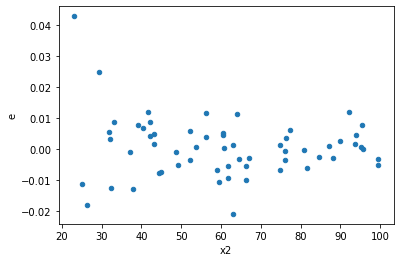

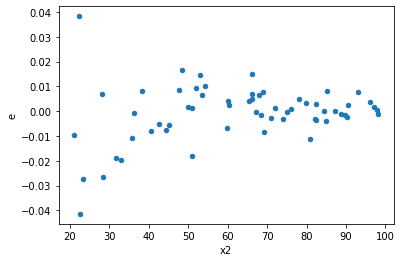

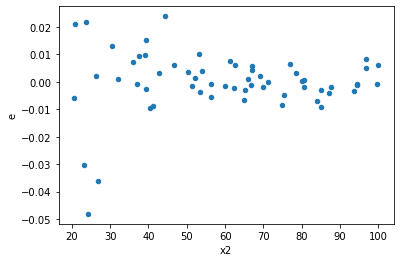

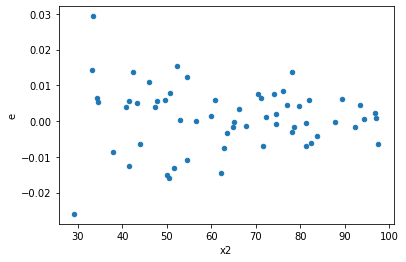

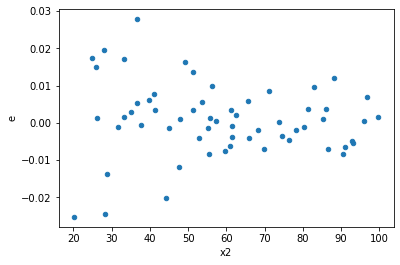

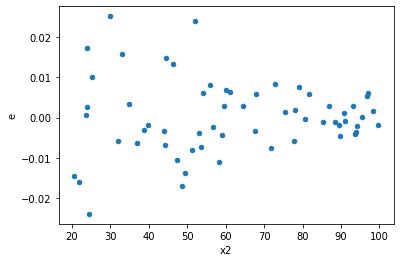

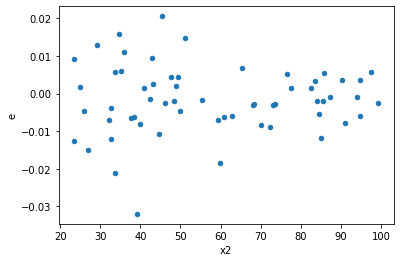

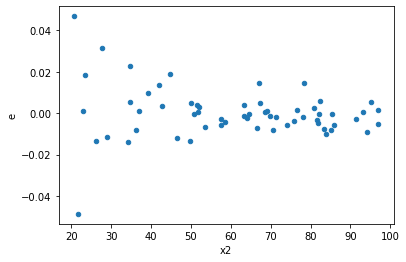

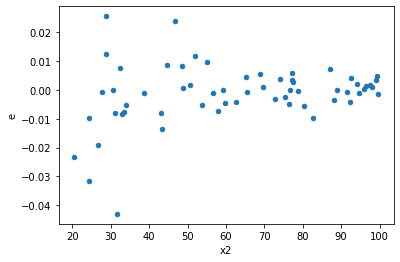

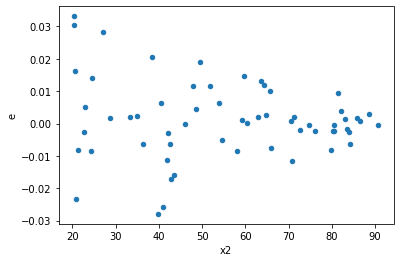

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,30.0,22.0,0.001730046871977242,0.0023836885705483665,5.7668229065908064e-05,0.00010834948047947121,1.8788418204353108,0.12943042118070824,0.9352847894096459,0.06471521059035412,Reject001=1 : Homoscedasticity
1.0,23.0,29.0,0.0005975912851595005,0.005155100581572496,2.59822297895435e-05,0.00017776208901974124,6.84167950401552,2.893099061651583e-06,0.9999985534504692,1.4465495308257914e-06,Reject001=0 : Heteroscedasticity
2.0,27.0,25.0,0.0005375794823570667,0.00666708106399504,1.9910351198409876e-05,0.0002666832425598016,13.394200830626234,6.665678453643409e-09,0.9999999966671608,3.3328392268217044e-09,Reject001=0 : Heteroscedasticity
7.0,31.0,21.0,0.0016838174198297935,0.005705002624301765,5.4316690962251404e-05,0.00027166679163341734,5.001534276493725,0.0002982090958125738,0.9998508954520937,0.0001491045479062869,Reject001=0 : Heteroscedasticity
9.0,30.0,22.0,0.003106183827485312,0.003972327373482948,0.00010353946091617706,0.0001805603351583158,1.743879421049844,0.18042586402040262,0.9097870679897987,0.09021293201020131,Reject001=1 : Homoscedasticity
11.0,27.0,25.0,0.001149986432151635,0.005643071972105772,4.259209007969018e-05,0.0002257228788842309,5.299643160546979,7.598314260159889e-05,0.9999620084286992,3.799157130079944e-05,Reject001=0 : Heteroscedasticity
13.0,28.0,24.0,0.001082547538523586,0.0030837450959449804,3.866241209012808e-05,0.0001284893789977075,3.3233668581820206,0.003860027165394353,0.9980699864173028,0.0019300135826971765,Reject001=0 : Heteroscedasticity
17.0,13.0,39.0,0.00035713055736715275,0.006611352825525175,2.7471581335934826e-05,0.00016952186732115834,6.170808489259095,8.888557382125128e-06,0.9999955557213089,4.444278691062564e-06,Reject001=0 : Heteroscedasticity
19.0,18.0,34.0,0.00022996741556237447,0.006216469201736982,1.2775967531243026e-05,0.0001828373294628524,14.311035858202704,1.1590772786007619e-10,0.9999999999420461,5.7953863930038096e-11,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,22.0,0.001730046871977242,0.0023836885705483665,5.7668229065908064e-05,0.00010834948047947121,1.8788418204353108,0.12943042118070824,Reject001=1 : Homoscedasticity
1.0,23.0,29.0,0.0005975912851595005,0.005155100581572496,2.59822297895435e-05,0.00017776208901974124,6.84167950401552,2.893099061651583e-06,Reject001=0 : Heteroscedasticity
2.0,27.0,25.0,0.0005375794823570667,0.00666708106399504,1.9910351198409876e-05,0.0002666832425598016,13.394200830626234,6.665678453643409e-09,Reject001=0 : Heteroscedasticity
3.0,22.0,30.0,0.0023909084831596123,0.0019491573894120375,0.00010867765832543692,6.497191298040125e-05,0.5978405679835488,0.21501911152649755,Reject001=1 : Homoscedasticity
4.0,21.0,31.0,0.002901992476806927,0.0018049014724060184,0.000138190117943187,5.8222628142129625e-05,0.4213226604674165,0.04228580026229729,Reject001=1 : Homoscedasticity
5.0,22.0,30.0,0.0030290653359214934,0.0013249936901571164,0.0001376847879964315,4.4166456338570546e-05,0.32077949191972643,0.007494733562979941,Reject001=0 : Heteroscedasticity
6.0,30.0,22.0,0.00291403966575183,0.0012338628705653059,9.7134655525061e-05,5.608467593478663e-05,0.577391000478883,0.16104677392207892,Reject001=1 : Homoscedasticity
7.0,31.0,21.0,0.0016838174198297935,0.005705002624301765,5.4316690962251404e-05,0.00027166679163341734,5.001534276493725,0.0002982090958125738,Reject001=0 : Heteroscedasticity
8.0,19.0,33.0,0.003390366089242948,0.0016436683604581473,0.00017844032048647095,4.9808132135095374e-05,0.2791304790268618,0.004718524426057371,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      587
Reject001=0 : Heteroscedasticity    413
Name: Result_test, dtype: int64